In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import math

ImagePath="F:\Studies\JU studies\Histogram\Image5.jpg"
ImageText="txtImage5.txt"

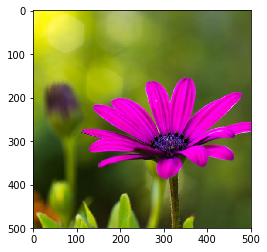

In [2]:
#rows=500
#columns=500

Im=Image.open(ImagePath)
plt.imshow(Im)

In [3]:
# k-means function where k is taken as user input
# R, G and B are passed to the function as arguments

def kMeans(R,G,B,k):
    
    # 'Mean' is an array which contains all the mean values
    # 'clusters' is an array where clusters are stored in each iteration
    # 'auxillary' is an array where clusters are copied so that they can be compared in next iteration
    # 'dist' is an array which stores distance of each point from each mean
    MEANS=[]
    clusters=[]
    auxillary=[]
    dist=[]
    for Loop in range(0,k):
        clusters.append([])
        auxillary.append([])
        dist.append(0)
    
    # Creating a list of unique mean values
    Index=0
    Count=0
    while Index<k:
        if Index==0:
            MEANS.append([R[Count],G[Count],B[Count]])
            Index=Index+1
        else:
            flag=0
            for Loop in range(0,len(MEANS)):
                if MEANS[Loop]==[R[Count],G[Count],B[Count]]:
                    flag=1
            if flag==0:
                MEANS.append([R[Count],G[Count],B[Count]])
                Index=Index+1
        Count=Count+1
        
    # Flag will stay 1 until the clusters remain same in two consecutive iterations
    # Count will be 0 only for first iteration
    Flag=1
    Count=0
    
    while Flag==1:
        Flag=0
        clusterList=[]

        # R, G and B have the same length
        for Loop in range(0,len(R)):
            # Calculate distance of point from mean and storing them in 'dist' list
            for CalDist in range(0,k):
                kMean=MEANS[CalDist]
                dx=kMean[0]-R[Loop]
                dy=kMean[1]-G[Loop]
                dz=kMean[2]-B[Loop]
                dist[CalDist]=int(math.sqrt(dx**2 + dy**2 + dz**2))
                    
            # Find minimum distance
            min=dist[0]
            clusterNo=0
            for CalDist in range(1,k):
                if dist[CalDist]<min:
                    min=dist[CalDist]
                    clusterNo=CalDist
                
            # Putting the point in the alloted cluster
            clusters[clusterNo].append([R[Loop],G[Loop],B[Loop]])
            clusterList.append(clusterNo)

        if Count==0:
            Flag=1
            Count=1
        else:
            # Checking with previous iteration's clusters
            for Index in range(0,len(clusters)):
                if(auxillary[Index]!=clusters[Index]):
                    Flag=1
           
        # Copying lists to auxillary lists   
        for Index in range(0,len(clusters)):
            auxillary[Index]=clusters[Index] 
                        
        # Finding new means
        for Index in range(0,k):
            rMean=0
            gMean=0
            bMean=0
            clustersCount=0
            clustersTemp=clusters[Index]
            for clustersIndex in range(0,len(clustersTemp)):
                clustersAdd=clustersTemp[clustersIndex]
                rMean=rMean+clustersAdd[0]              
                gMean=gMean+clustersAdd[1]
                bMean=bMean+clustersAdd[2]
                clustersCount=clustersCount+1
            rMean=rMean/clustersCount
            gMean=gMean/clustersCount
            bMean=bMean/clustersCount
            r=int(rMean)
            g=int(gMean)
            b=int(bMean)
            MEANS[Index]=[r,g,b]
            
        # Clearing the 'clusters' list
        for Loop in range(0,k):
            clusters[Loop]=[]
               
    return clusterList

In [6]:
img=Im.load()
[rows,columns]=Im.size

# Finding RGB colour of each pixel and storing them in 3 lists: R[], G[] and B[]
R=[]
G=[]
B=[]
TotalPixels=rows*columns

for Loop in range(0,TotalPixels):
    R.append(0)
    G.append(0)
    B.append(0)
    
Count=0
for Loop1 in range(0,rows):
     for Loop2 in range(0,columns):
        [r,g,b]=img[Loop1,Loop2]
        R[Count]=r
        G[Count]=g
        B[Count]=b
        Count=Count+1

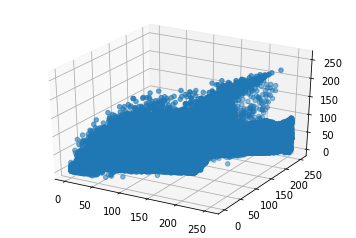

In [27]:
# Plotting R, G, B in three axes
ax = plt.axes(projection="3d")
ax.scatter3D(R, G, B);
plt.show()

In [ ]:
# Taking 'k' as input
k=int(input("Enter the value of k: "))

# Calling 'k-means' function and storing the received clusters in 'clusters' list
clustersList=kMeans(R,G,B,k)

# Taking the clusters in 'X', to display the graphs later
X=[]
for Loop in range(0,k):
    X.append([])
for Loop in range(0,k):
    X[Loop]=clustersList[Loop]

Enter the value of k: 5


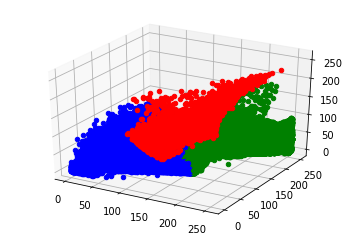

In [8]:
# Showing the clusters in 3D
Loop=0
ax = plt.axes(projection="3d")

while Loop<len(clustersList):
    if(clustersList[Loop]==0):
        ax.scatter3D(R[Loop],G[Loop],B[Loop],color='red')
        
    elif(clustersList[Loop]==1):
        ax.scatter3D(R[Loop],G[Loop],B[Loop],color='green')
        
    elif(clustersList[Loop]==2):
        ax.scatter3D(R[Loop],G[Loop],B[Loop],color='blue')
        
    elif(clustersList[Loop]==3):
        ax.scatter3D(R[Loop],G[Loop],B[Loop],color='yellow')

    else:
        ax.scatter3D(R[Loop],G[Loop],B[Loop],color='black')
        
    Loop=Loop+1
    
plt.show()

In [ ]:
# Writing new R,G,B values
NewFile=open("newimage.txt","w+")

NewFile.write('P3\n# Created by GIMP version 2.10.18 PNM plug-in\n'+str(rows)+' '+str(columns)+'\n'+str(255)+'\n')

Loop=0
while Loop<len(clustersList):
    # Cluster=0, Colour=red
    if(clustersList[Loop]==0):
        NewFile.write(str(255)+'\n'+str(0)+'\n'+str(0)+'\n')
     
    # Cluster=1, Colour=green
    elif(clustersList[Loop]==1):
        NewFile.write(str(0)+'\n'+str(255)+'\n'+str(0)+'\n')
      
    # Cluster=2, Colour=blue
    elif(clustersList[Loop]==2):
        NewFile.write(str(0)+'\n'+str(0)+'\n'+str(255)+'\n')
    
    # Cluster=3, Colour=white
    elif(clustersList[Loop]==3):
        NewFile.write(str(0)+'\n'+str(0)+'\n'+str(0)+'\n')
    
    # Cluster=4, Colour=black
    elif(clustersList[Loop]==4):
        NewFile.write(str(255)+'\n'+str(255)+'\n'+str(255)+'\n')
    Loop=Loop+1
    
NewFile.write('\n')